In [109]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
#load data form csv

train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")



In [3]:
train.shape


(60000, 785)

In [4]:
test.shape

(10000, 785)

In [5]:
if train.equals(test):
    print("Both datasets are equal")
else:
    print("Datasets are not equal")

Datasets are not equal


In [7]:
train['label'].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [10]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

# Get Classes Distribution Method Implementation
def get_classes_distribution(train):
    # Get the count for each label
    label_counts = train["label"].value_counts()

    # Get total number of samples
    total_samples = len(train)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

# Calculate the distribution of the classes in the training dataset
get_classes_distribution(train)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


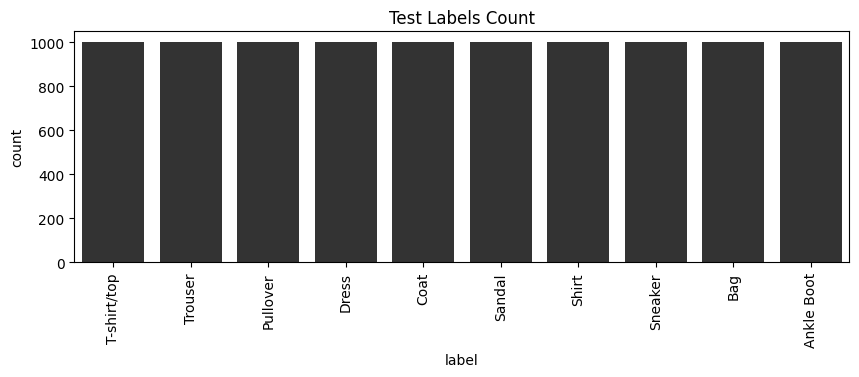

In [82]:
# Plot Label Per Class Method Implementation for Testing Dataset
def plot_label_per_class(test):
    # Convert test to pandas dataframe
    test_df = pd.DataFrame(test)

    # Create plot
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x='label', data=test_df, palette=['#333333' for i in range(10)])
    plt.xticks(list(labels.keys()), list(labels.values()), rotation='vertical')
    ax.set_title('Test Labels Count')

    plt.show()

# Visualize the class distribution in the testing dataset
plot_label_per_class(test)

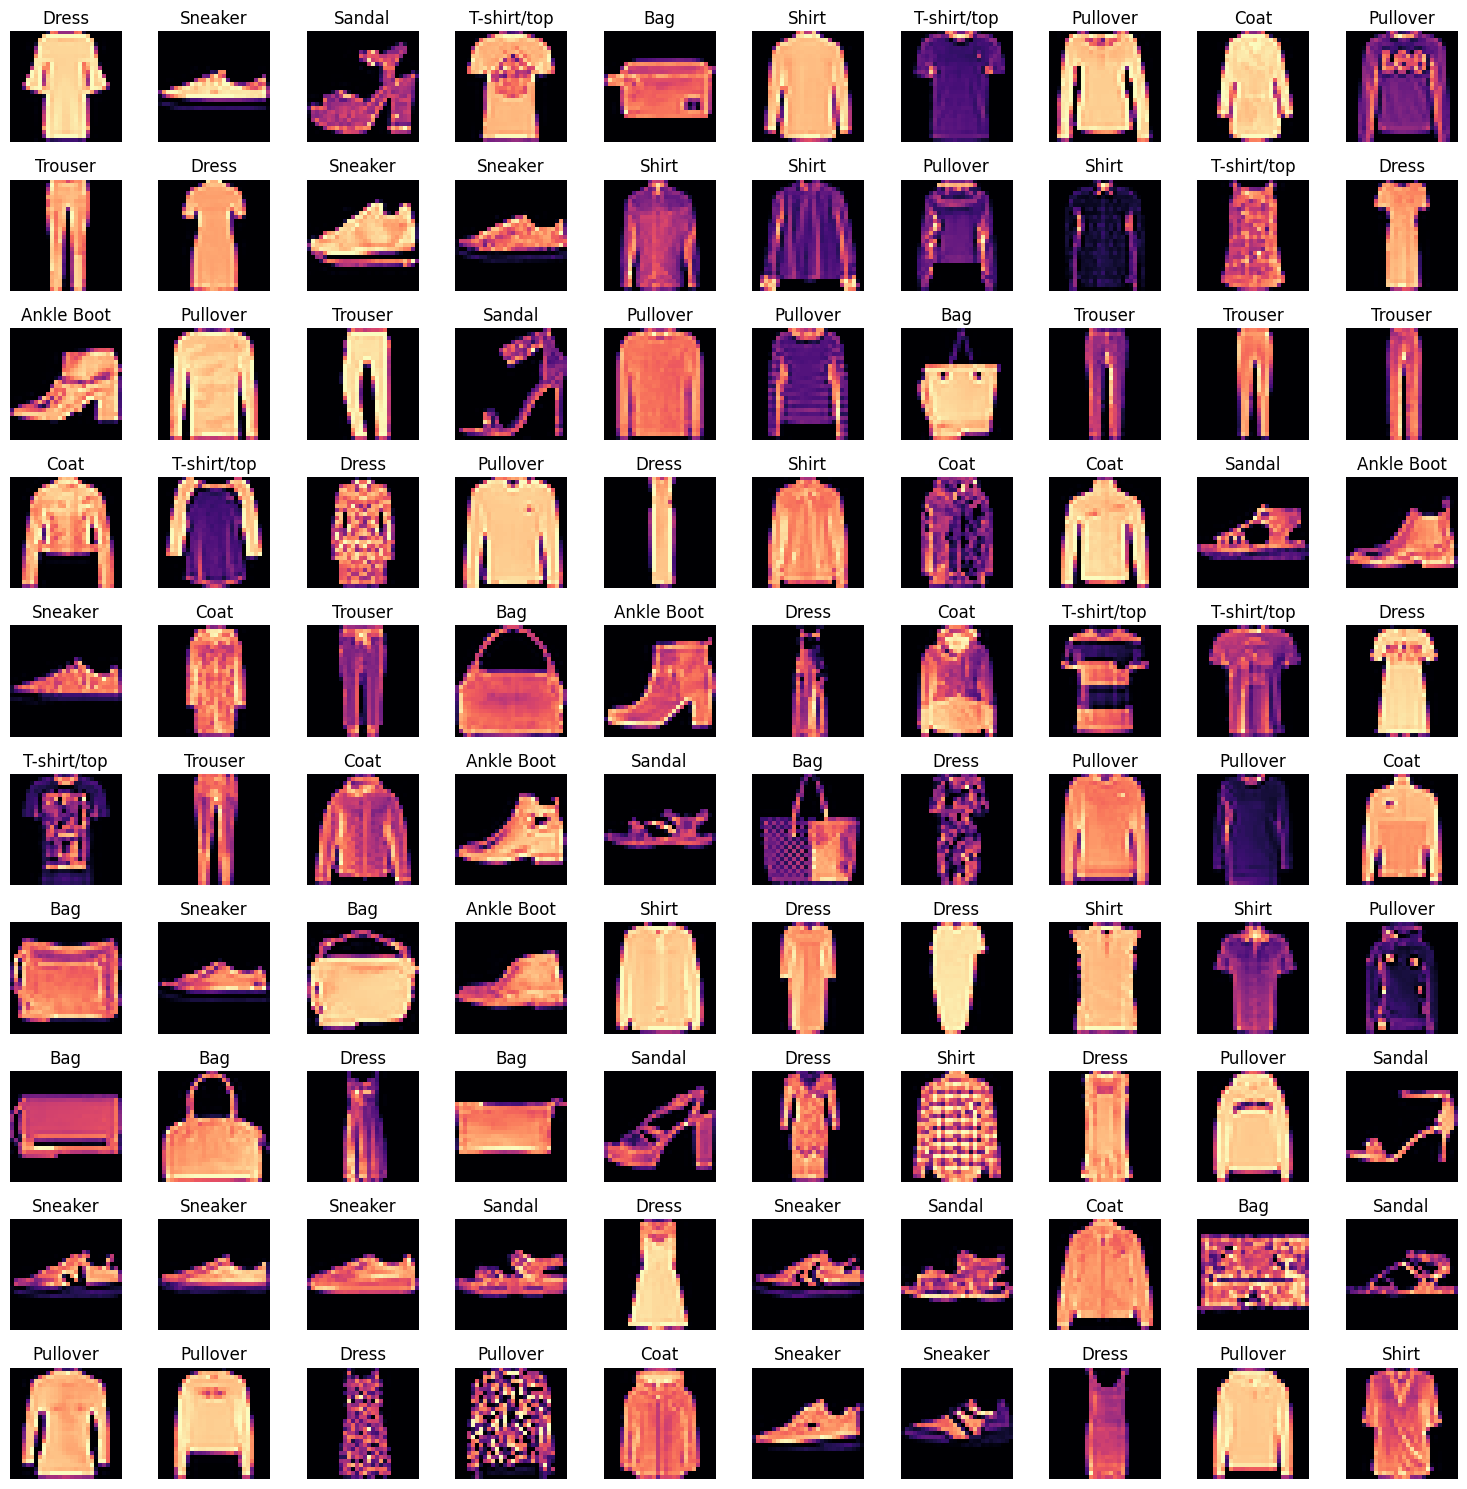

In [86]:
#Data Visualization
#Class Names from Dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#First few train images with labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(train_images))
    img = train_images[data_idx].reshape([28,28])
    label = labels[train_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

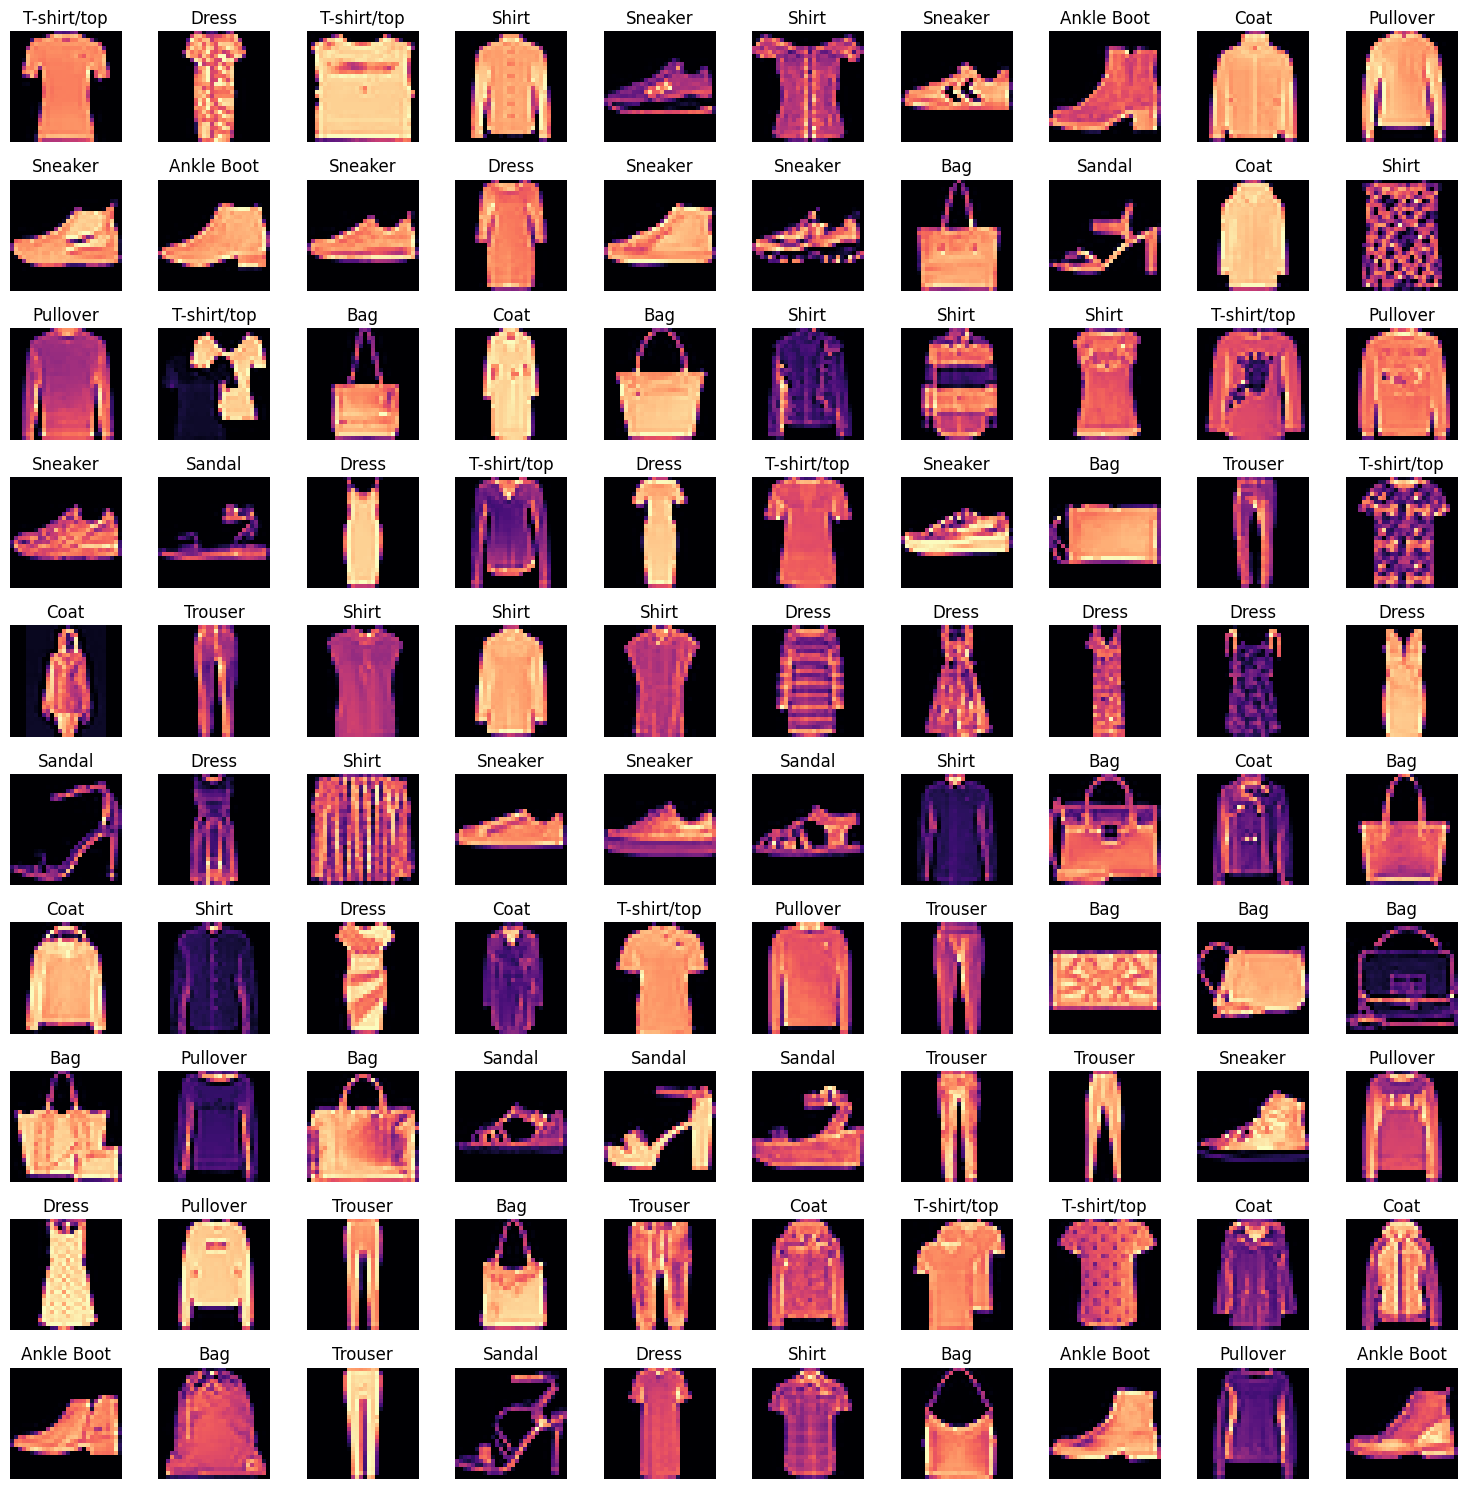

In [87]:
#First few test images with labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(test_images))
    img = test_images[data_idx].reshape([28, 28])
    label = labels[test_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [83]:
# Rescaling image data
train_images = np.array(train.iloc[:, 1:])
train_labels = np.array(train.iloc[:, 0])
test_images = np.array(test.iloc[:, 1:])
test_labels = np.array(test.iloc[:, 0])

In [85]:
# Reshaping images
train_images = train_images.reshape(train_images.shape[0], 784)
test_images = test_images.reshape(test_images.shape[0], 784)

# Fix data type and Normalizing images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [91]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

next we are going to feature sacle x values

In [43]:
scaler = StandardScaler()
x = scaler.fit_transform(x_train)
x[0:5]

array([[-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557]])

In [92]:
# Print the shapes of the resulting arrays to verify the split
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing images shape:", x_test.shape)
print("Testing labels shape:", _test.shape)


Training images shape: (48000, 784)
Training labels shape: (48000,)
Testing images shape: (12000, 784)
Testing labels shape: (12000,)


train modal and test with test data and get accuracy

In [93]:
# Create a KNN classifier with k=2
knn = KNeighborsClassifier(n_neighbors=2)

# Train the model using the training data
knn.fit(x_train, y_train)

# Test the model using the testing data
accuracy = knn.score(x_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8449166666666666


In [97]:
pred = knn.predict(x_test)
pred[0:5]

array([7, 8, 8, 9, 9])

In [98]:
y_test[0:5]

array([7, 8, 8, 5, 9])

next we looking for best K values for the knn algorithm.

Here we are getting 1 to 10 k values and getting correctly predicted values count and store in array

In [99]:
accuracies = []
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    accuracy = model.score(x_test, y_test)
    accuracies.append(accuracy)

In [100]:
accuracies

[0.8485833333333334,
 0.8449166666666666,
 0.8561666666666666,
 0.8550833333333333,
 0.8558333333333333,
 0.8574166666666667,
 0.8551666666666666,
 0.8545,
 0.8530833333333333,
 0.8524166666666667]

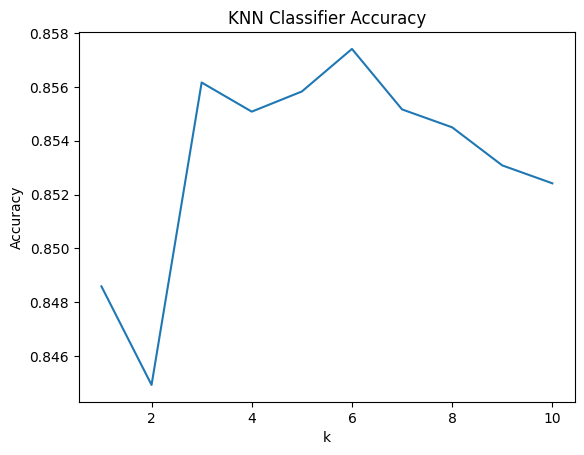

Best k value: 6
Highest accuracy: 0.8574166666666667


In [101]:
k_values = []

for i in range(1,11):
  k_values.append(i)

# Find the k value with the highest accuracy
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)

# Plot the accuracies for each k value
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy')
plt.show()

print(f'Best k value: {best_k}')
print(f'Highest accuracy: {best_accuracy}')


In [102]:
# Create a KNN classifier best k value
knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the model using the training data
knn.fit(x_train, y_train)

# Test the model using the testing data
accuracy = knn.score(x_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8574166666666667


In [115]:
predicted_labels = knn.predict(x_test)
actual_labels = y_test

In [116]:
predicted_labels

array([7, 8, 8, ..., 9, 5, 5])

In [119]:
print(classification_report(y_test, predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.75      0.89      0.81      1232
     Trouser       0.99      0.96      0.97      1174
    Pullover       0.73      0.83      0.78      1200
       Dress       0.89      0.88      0.88      1242
        Coat       0.78      0.74      0.76      1185
      Sandal       0.99      0.86      0.92      1141
       Shirt       0.67      0.54      0.60      1243
     Sneaker       0.90      0.97      0.93      1224
         Bag       0.98      0.95      0.96      1149
  Ankle boot       0.92      0.97      0.94      1210

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



In [117]:
from tabulate import tabulate

results = []

for ind, row in enumerate(x_test[:36]):
    predicted_class = labels[predicted_labels[ind]]
    actual_class = labels[actual_labels[ind]]
    results.append([predicted_class, actual_class])
# results[0:100]

#display first 100 values 
print(tabulate(results[0:100], headers=['Predicted Class', 'Actual Class'], tablefmt='grid'))


+-------------------+----------------+
| Predicted Class   | Actual Class   |
+===================+================+
| Sneaker           | Sneaker        |
+-------------------+----------------+
| Bag               | Bag            |
+-------------------+----------------+
| Bag               | Bag            |
+-------------------+----------------+
| Ankle Boot        | Sandal         |
+-------------------+----------------+
| Ankle Boot        | Ankle Boot     |
+-------------------+----------------+
| Trouser           | Trouser        |
+-------------------+----------------+
| Pullover          | Pullover       |
+-------------------+----------------+
| T-shirt/top       | Shirt          |
+-------------------+----------------+
| Shirt             | Shirt          |
+-------------------+----------------+
| Coat              | Pullover       |
+-------------------+----------------+
| Ankle Boot        | Sandal         |
+-------------------+----------------+
| T-shirt/top       | T-s

<ipython-input-118-2af32b34aa4c>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 6, ind+1)


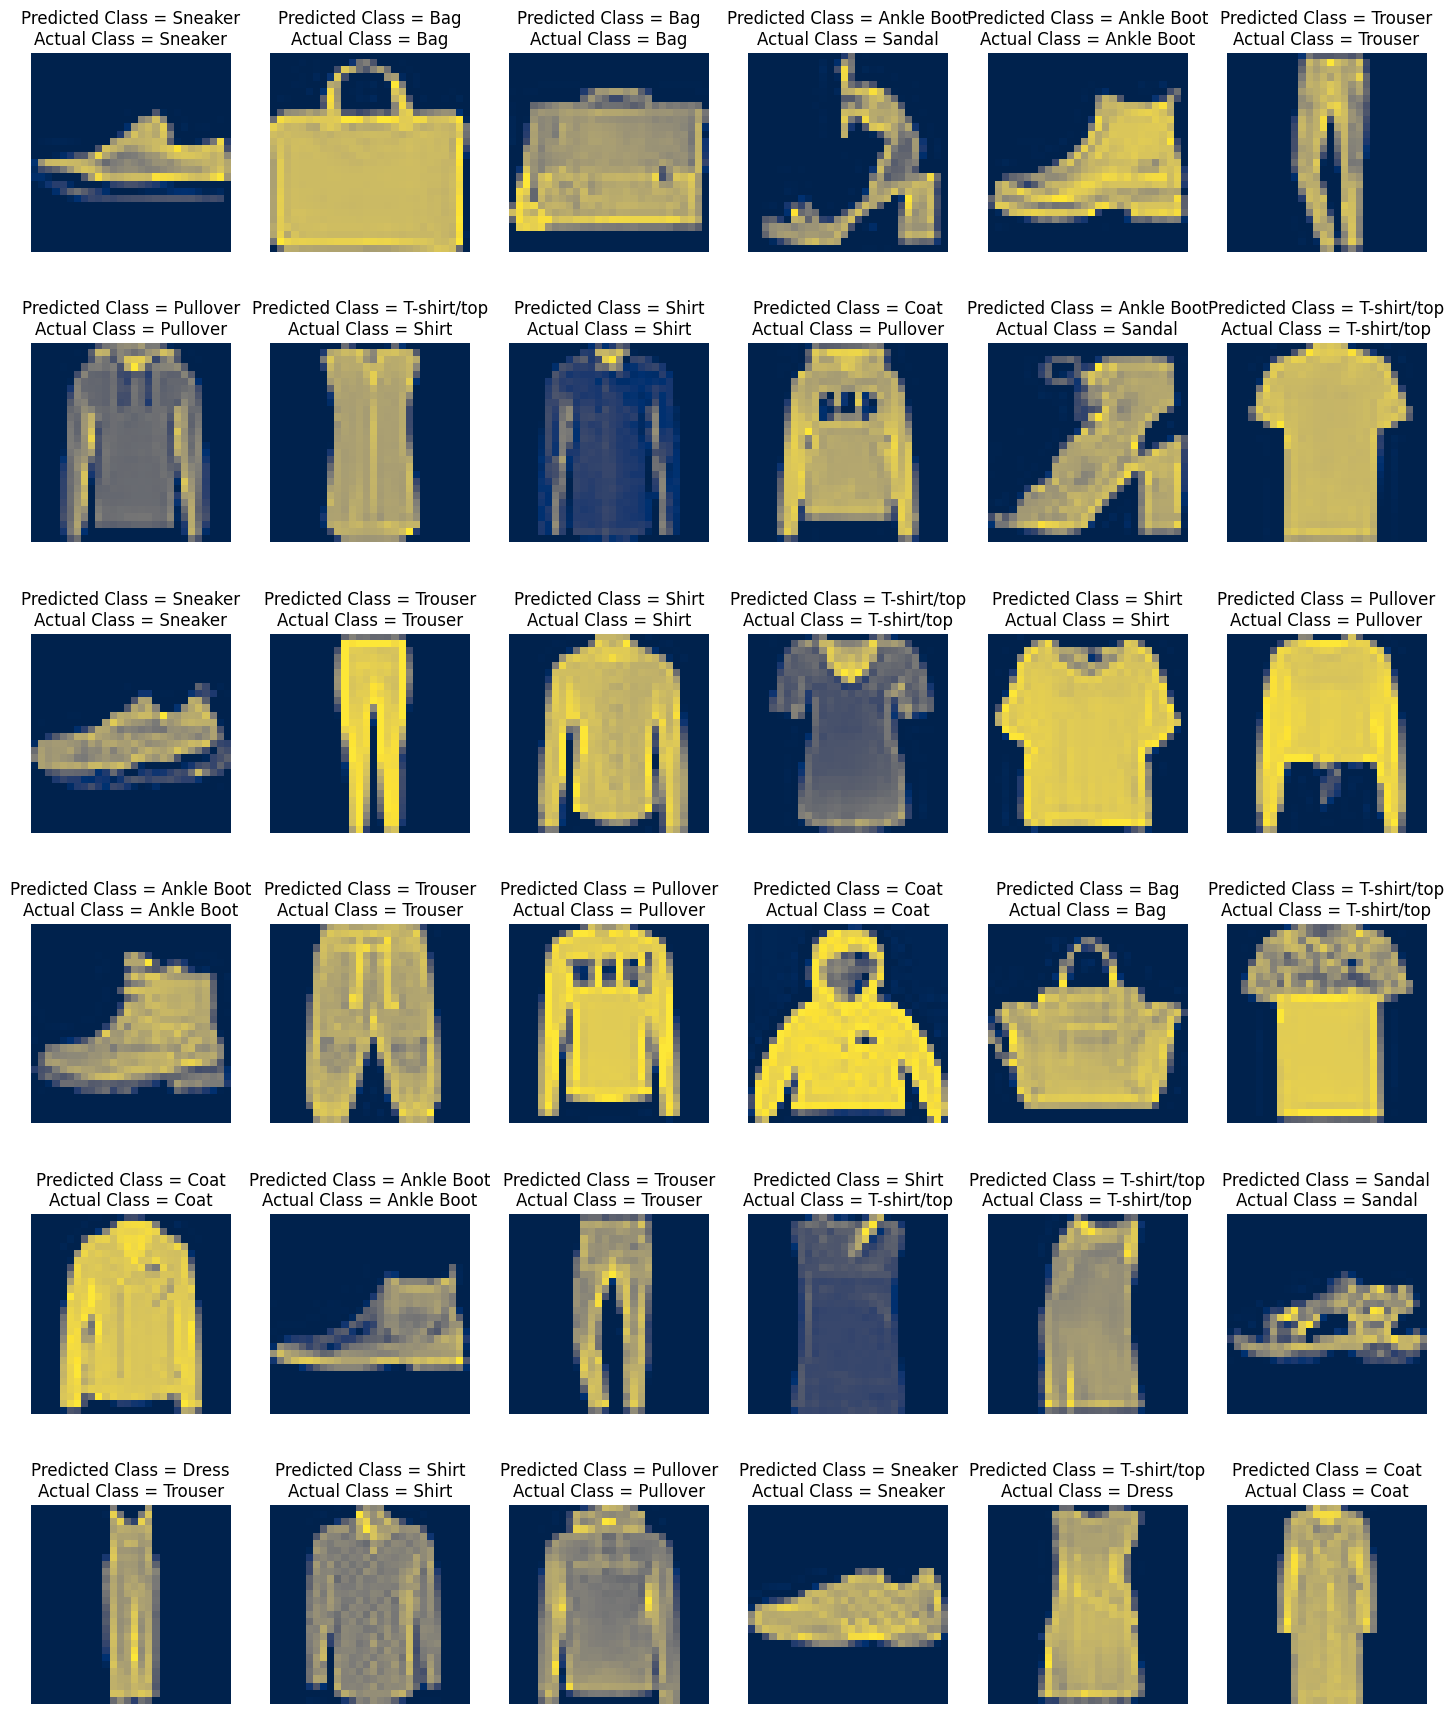

In [118]:
# Predicted targets of each images
fig, ax = plt.subplots(figsize=(18, 22))
for ind, row in enumerate(x_test[:36]):
    plt.subplot(6, 6, ind+1)
    plt.title('Predicted Class = ' + labels[predicted_labels[ind]] + '\n' + 'Actual Class = ' + labels[actual_labels[ind]])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.savefig('./knn_predicted_target_images.png')
    plt.imshow(img, cmap='cividis')